# Предобработка данных

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("london_merged.csv")

data.shape

(17414, 10)

In [3]:
data.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


In [4]:
data.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
timestamp       17414 non-null object
cnt             17414 non-null int64
t1              17414 non-null float64
t2              17414 non-null float64
hum             17414 non-null float64
wind_speed      17414 non-null float64
weather_code    17414 non-null float64
is_holiday      17414 non-null float64
is_weekend      17414 non-null float64
season          17414 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
for i in data:
    print(data[i].value_counts())

2016-06-22 07:00:00    1
2016-05-25 01:00:00    1
2016-12-15 05:00:00    1
2016-08-19 21:00:00    1
2015-06-22 21:00:00    1
2015-07-19 08:00:00    1
2015-10-22 10:00:00    1
2015-11-18 18:00:00    1
2016-03-30 08:00:00    1
2015-08-25 15:00:00    1
2015-06-26 01:00:00    1
2015-03-29 19:00:00    1
2016-03-04 13:00:00    1
2016-11-01 23:00:00    1
2016-12-02 23:00:00    1
2016-11-19 22:00:00    1
2015-06-07 13:00:00    1
2016-07-24 16:00:00    1
2016-02-04 06:00:00    1
2016-11-12 04:00:00    1
2016-11-02 16:00:00    1
2016-06-14 20:00:00    1
2015-10-06 19:00:00    1
2015-09-07 18:00:00    1
2015-12-13 18:00:00    1
2015-01-14 04:00:00    1
2015-06-12 02:00:00    1
2015-08-06 23:00:00    1
2015-02-28 22:00:00    1
2015-03-04 21:00:00    1
                      ..
2016-04-29 17:00:00    1
2015-10-03 16:00:00    1
2016-02-21 13:00:00    1
2015-08-25 16:00:00    1
2016-11-14 02:00:00    1
2015-10-25 13:00:00    1
2016-07-26 13:00:00    1
2015-07-24 16:00:00    1
2015-02-10 23:00:00    1


Данные соответствуют описанию, пустых значений нет

In [7]:
data.season = data.season.astype('int32')
data.is_weekend = data.is_weekend.astype('int32')
data.is_holiday = data.is_holiday.astype('int32')
data.weather_code = data.weather_code.astype('int32')
#Переводим категориальные признаки в int

In [8]:
data['timestamp'] = [pd.to_datetime(x) for x in data['timestamp']]

data['hour'] = [x.hour for x in data['timestamp']]
data['month'] = [x.month for x in data['timestamp']]
data['day'] = [x.day for x in data['timestamp']]
data['dow'] = [x.dayofweek for x in data['timestamp']]
data['year'] = [x.year for x in data['timestamp']]
# Новые переменные из timestamp

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 12,10

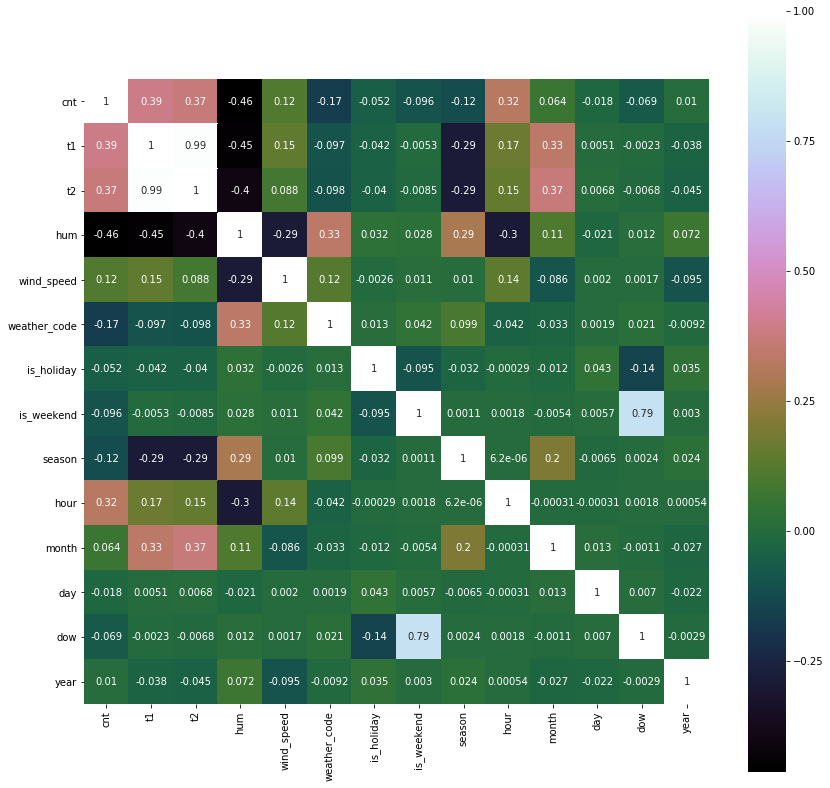

In [10]:
plt.figure(figsize = (14, 14))
numbers_cor = data.describe().columns
sns.heatmap(data[numbers_cor].corr(), vmax = 1, square = True, annot = True, cmap = 'cubehelix')

In [11]:
del data['t2'] #Корреляция между t1 и t2 почти равна единице 

In [12]:
from matplotlib.pyplot import figure

C:\Users\marte\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Density Plot of cnt by seasons')

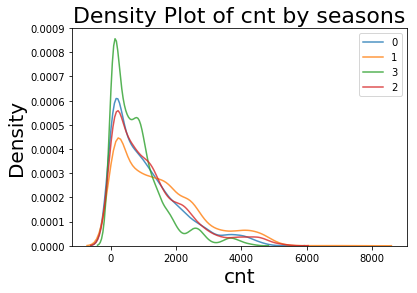

In [13]:
types = data.dropna(subset=['cnt'])
types = types['season'].value_counts()
types = list(types[types.values > 100].index)


for s_type in types:
    subset = data[data['season'] == s_type]
    
    sns.kdeplot(subset['cnt'].dropna(),
               label = s_type, shade = False, alpha = 0.8);
    

plt.xlabel('cnt', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of cnt by seasons', size = 22)


#0-spring ; 1-summer; 2-fall; 3-winter

Целевая переменная сильно зависит от сезона.
Осень и зима распределены почти одинаково, можно объединить

In [14]:
 data.season.replace([0], [2], inplace=True)
        

Text(0.5, 1.0, 'Density Plot of cnt by is_weekend')

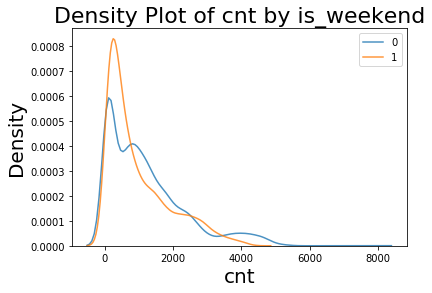

In [15]:
types = data.dropna(subset=['cnt'])
types = types['is_weekend'].value_counts()
types = list(types[types.values > 100].index)


for s_type in types:
    subset = data[data['is_weekend'] == s_type]
    
    sns.kdeplot(subset['cnt'].dropna(),
               label = s_type, shade = False, alpha = 0.8);
    

plt.xlabel('cnt', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of cnt by is_weekend', size = 22)


#1 if the day is weekend

Text(0.5, 1.0, 'Density Plot of cnt by is_holiday')

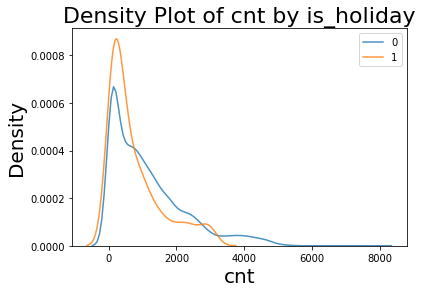

In [16]:
types = data.dropna(subset=['cnt'])
types = types['is_holiday'].value_counts()
types = list(types[types.values > 100].index)


for s_type in types:
    subset = data[data['is_holiday'] == s_type]
    
    sns.kdeplot(subset['cnt'].dropna(),
               label = s_type, shade = False, alpha = 0.8);
    

plt.xlabel('cnt', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of cnt by is_holiday', size = 22)


# 1 holiday / 0 non holiday

Text(0.5, 1.0, 'Density Plot of cnt by weather')

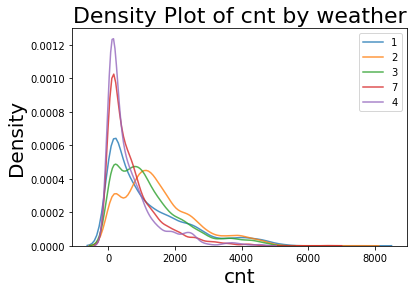

In [17]:
types = data.dropna(subset=['cnt'])
types = types['weather_code'].value_counts()
types = list(types[types.values > 100].index)


for s_type in types:
    subset = data[data['weather_code'] == s_type]
    
    sns.kdeplot(subset['cnt'].dropna(),
               label = s_type, shade = False, alpha = 0.8);
    

plt.xlabel('cnt', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of cnt by weather', size = 22)


# 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
# 2 = scattered clouds / few clouds
# 3 = Broken clouds
# 4 = Cloudy
# 7 = Rain/ light Rain shower/ Light rain

Все категориальные признаки значимы

In [18]:
#is_holiday и is weekend похожим образом распределены, также праздников мало.
#Создадим новую переменную not_working, объеденяющую их


not_working = list(data['is_holiday'])
k = 0
for i in data['is_weekend']:
    if i == 1:
        not_working[k] = 1
    k = k + 1
    
    
data['not_working'] = not_working
data['not_working'].value_counts()

0    12060
1     5354
Name: not_working, dtype: int64

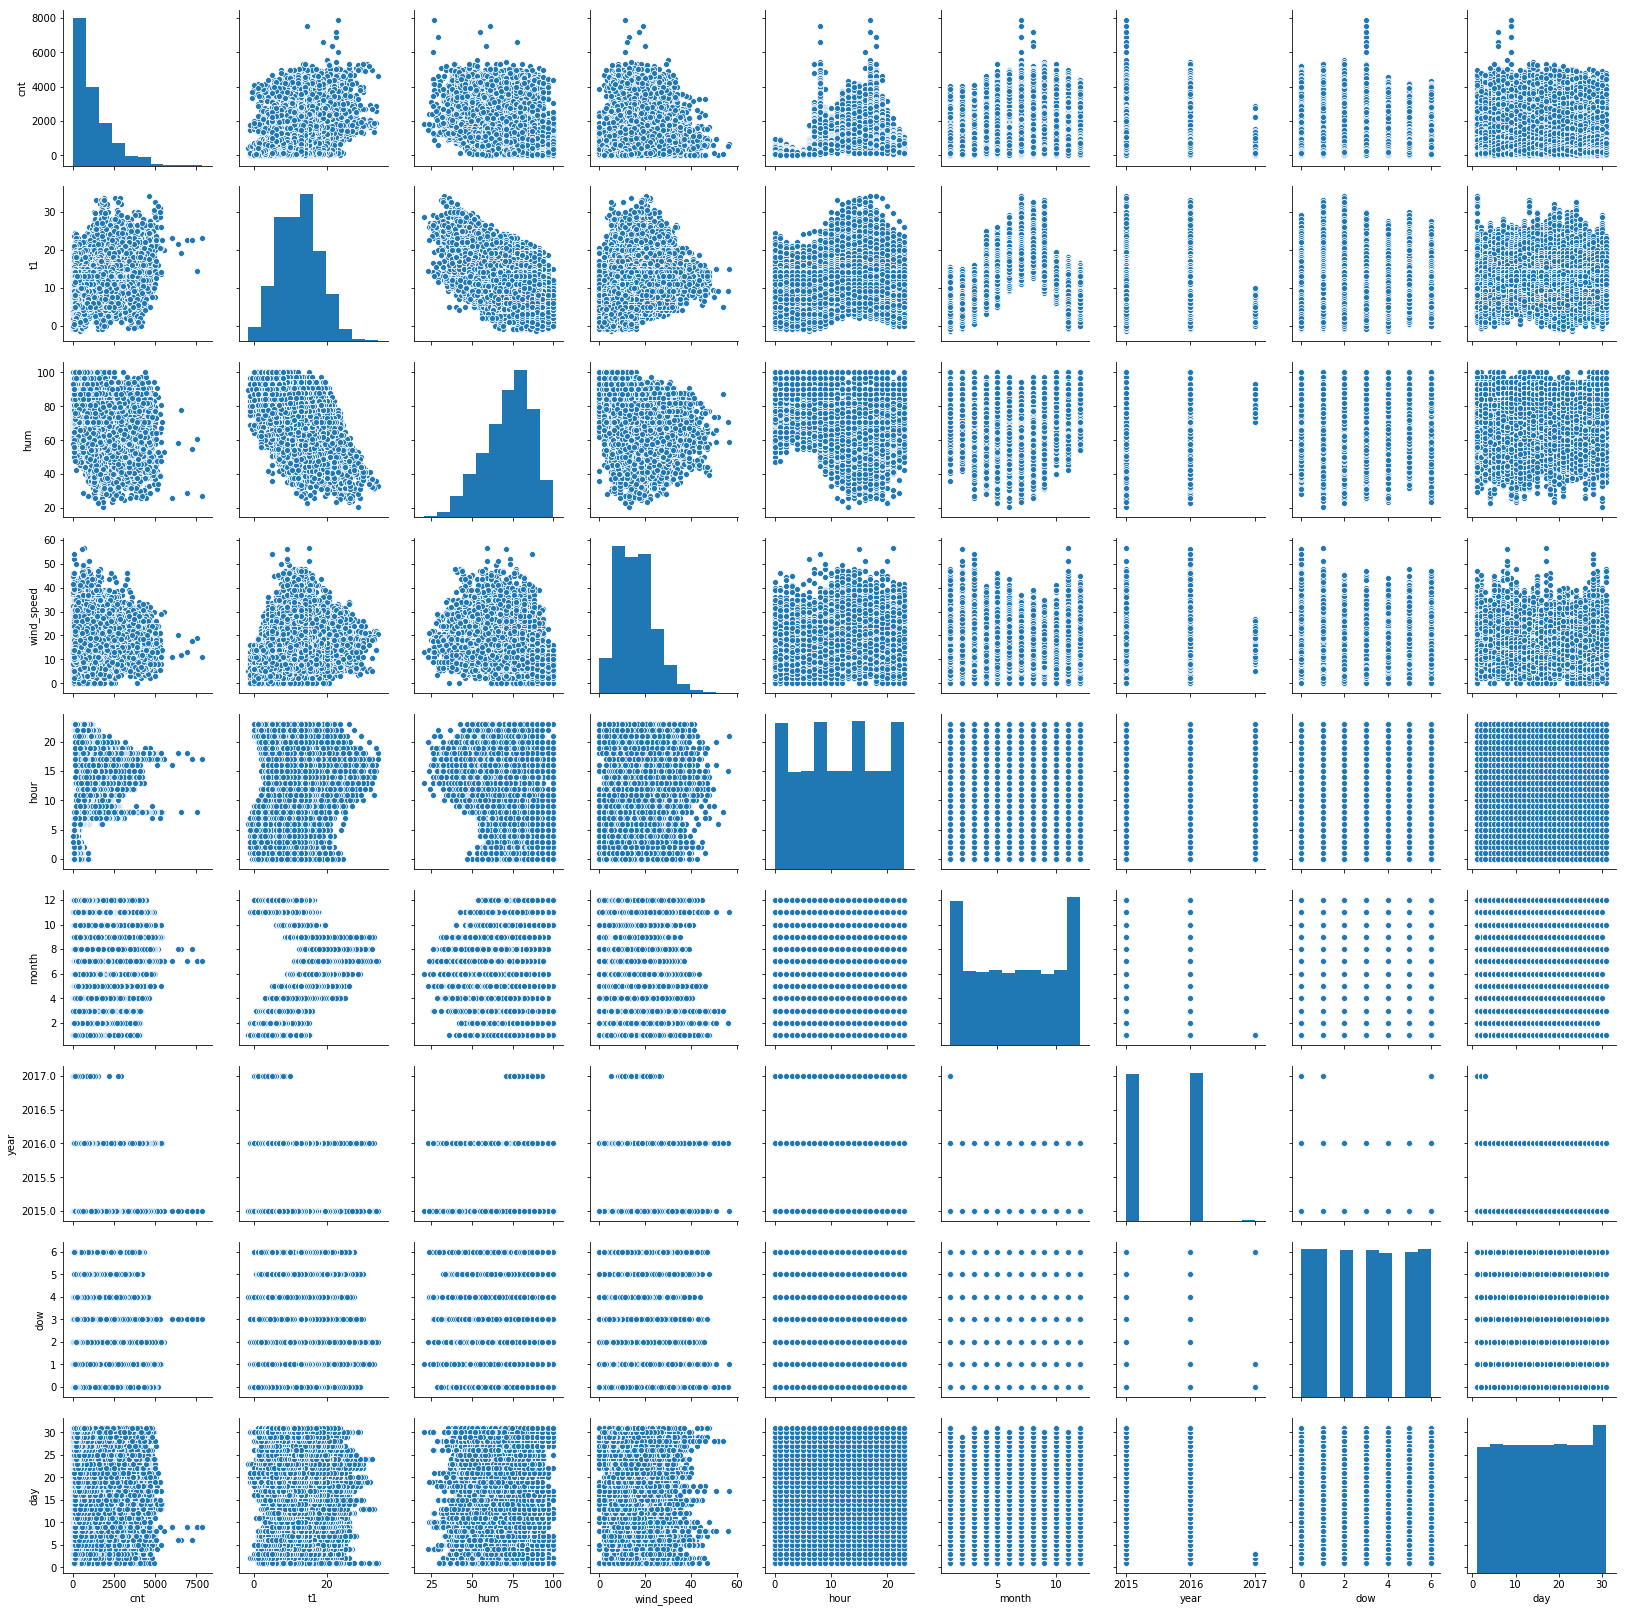

In [43]:
numeric_data = data[['cnt', 't1', 'hum', 'wind_speed', 'hour', 'month', 'year', 'dow', 'day']]

sns.pairplot(numeric_data)

Связь между признаками и целевой переменной не ясная

In [44]:
categorical_subset = data[['weather_code', 'not_working', 'season']]

w_c_dummy = pd.get_dummies(categorical_subset['weather_code'])
n_w_dummy = pd.get_dummies(categorical_subset['not_working'])
s_dummy = pd.get_dummies(categorical_subset['season'])
cat_features = pd.concat([w_c_dummy, n_w_dummy, s_dummy], axis = 1)

In [45]:
features = pd.concat([cat_features, numeric_data], axis = 1)
features.columns = ['Clear','Few_clouds','Broken_clouds','Cloudy','Rain','Thunder','Snowfall','working','not_working','Summer','Fall_Spring','Winter', 'cnt', 't1', 'hum', 'wind_speed','hour', 'month', 'dow', 'year', 'day']

In [46]:
y = features['cnt']
x = features.loc[:, features.columns != 'cnt']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X, X_test, Y, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 2100)

In [49]:
X, X_val, Y, Y_val = train_test_split(X, Y, test_size = 0.2, random_state = 2100)

# Регрессия

In [50]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

MSE 783065.767188606
R2: 0.3130125420663872
MAE: 649.4722610209108
Average CV: 0.32266510830134765


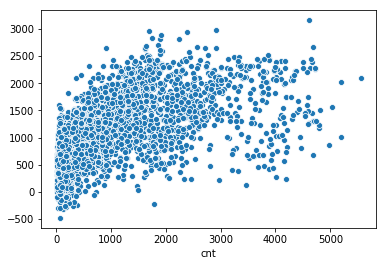

In [51]:
#Лассо
model = Lasso()
model.fit(X, Y)

y_pred = model.predict(X_val)

mae = mean_absolute_error(Y_val, y_pred)
R2 = r2_score(Y_val, y_pred)
mse = mean_squared_error(Y_val, y_pred)

print('MSE', mse)
print('R2:', R2)
print('MAE:', mae)

#Кросс-валидация
scores = cross_val_score(model, X, Y, cv=5,
                        scoring='r2')
print('Average CV:', scores.mean())

sns.scatterplot(Y_val, y_pred)

MSE 783470.3787186496
R2: 0.31265757437641506
MAE: 649.9314658243222
Average CV: 0.322904957368777


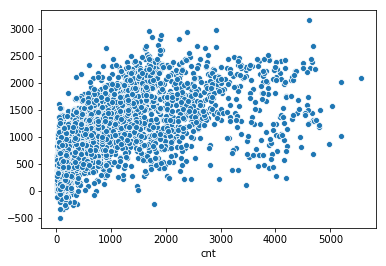

In [52]:
#Ридж
model = Ridge()
model.fit(X, Y)

y_pred = model.predict(X_val)

mae = mean_absolute_error(Y_val, y_pred)
R2 = r2_score(Y_val, y_pred)
mse = mean_squared_error(Y_val, y_pred)

print('MSE', mse)
print('R2:', R2)
print('MAE:', mae)

#Кросс-валидация
scores = cross_val_score(model, X, Y, cv=5,
                        scoring='r2')
print('Average CV:', scores.mean())

sns.scatterplot(Y_val, y_pred)

C:\Users\marte\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


MSE 805760.9712988539
R2: 0.29310192761702847
MAE: 616.8792760059489


C:\Users\marte\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\marte\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\marte\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\marte\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Average CV: -0.5204743496451126


C:\Users\marte\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


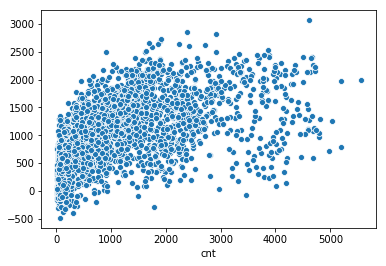

In [53]:
#SVM
model = svm.LinearSVR()
model.fit(X, Y)

y_pred = model.predict(X_val)

mae = mean_absolute_error(Y_val, y_pred)
R2 = r2_score(Y_val, y_pred)
mse = mean_squared_error(Y_val, y_pred)

print('MSE', mse)
print('R2:', R2)
print('MAE:', mae)

#Кросс-валидация
scores = cross_val_score(model, X, Y, cv=5,
                        scoring='r2')
print('Average CV:', scores.mean())

sns.scatterplot(Y_val, y_pred)

#Liblinear failed to converge (необходима нормализация, будет дальше)

Среди линейных алгоритмов Ридж и Лассо регрессии показали себя примерно одинаково успешно, SVM справился значительно хуже

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from xgboost import plot_importance

MSE 82947.38428417653
R2: 0.9272298508512069
MAE: 163.14029422317904
Average value on cross-validation: 0.9146441649860965


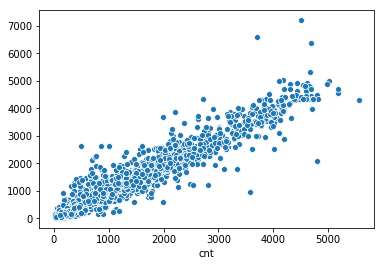

In [55]:
#Деревья
model = DecisionTreeRegressor()
model.fit(X, Y)

y_pred = model.predict(X_val)

mae = mean_absolute_error(Y_val, y_pred)
R2 = r2_score(Y_val, y_pred)
mse = mean_squared_error(Y_val, y_pred)

print('MSE', mse)
print('R2:', R2)
print('MAE:', mae)


scores = cross_val_score(model, X, Y, cv=5,
                         scoring='r2')
print('Average value on cross-validation:',scores.mean())

sns.scatterplot(Y_val, y_pred)

C:\Users\marte\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MSE 49147.82159311087
R2: 0.956882373826088
MAE: 125.32034445640473
Average value on cross-validation: 0.9540219271311938


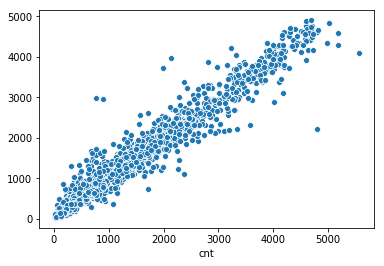

In [56]:
#Лес
model = RandomForestRegressor()
model.fit(X, Y)

y_pred = model.predict(X_val)

mae = mean_absolute_error(Y_val, y_pred)
R2 = r2_score(Y_val, y_pred)
mse = mean_squared_error(Y_val, y_pred)

print('MSE', mse)
print('R2:', R2)
print('MAE:', mae)


scores = cross_val_score(model, X, Y, cv=5,
                         scoring='r2')
print('Average value on cross-validation:',scores.mean())

sns.scatterplot(Y_val, y_pred)

MSE 651208.5610540436
R2: 0.42869151904150204
MAE: 654.5892009188213
Average value on cross-validation: 0.4850465195691382


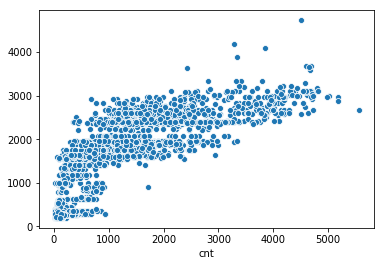

In [57]:
#Ада
model = AdaBoostRegressor()
model.fit(X, Y)

y_pred = model.predict(X_val)

mae = mean_absolute_error(Y_val, y_pred)
R2 = r2_score(Y_val, y_pred)
mse = mean_squared_error(Y_val, y_pred)

print('MSE', mse)
print('R2:', R2)
print('MAE:', mae)


scores = cross_val_score(model, X, Y, cv=5,
                         scoring='r2')
print('Average value on cross-validation:',scores.mean())

sns.scatterplot(Y_val, y_pred)

MSE 122556.31536519942
R2: 0.8924807403486331
MAE: 232.2187520291671
Average value on cross-validation: 0.8956031581918005


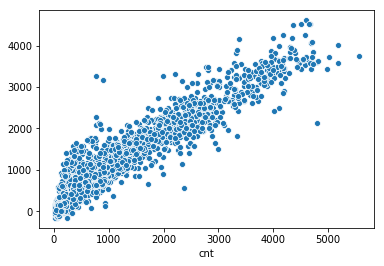

In [58]:
#Градиентный бустинг
model = xgb.XGBRegressor()
model.fit(X, Y)

y_pred = model.predict(X_val)

mae = mean_absolute_error(Y_val, y_pred)
R2 = r2_score(Y_val, y_pred)
mse = mean_squared_error(Y_val, y_pred)

print('MSE', mse)
print('R2:', R2)
print('MAE:', mae)


scores = cross_val_score(model, X, Y, cv=5,
                          scoring='r2')
print('Average value on cross-validation:',scores.mean())

sns.scatterplot(Y_val, y_pred)

Лучше всего показали себя решающие деревья и лес, ада показала средний результат, но намного лучше линейных алгоритмов.

R2 с использованием кросс-валидации и R2 c использованием валидационной выборки имеют минимальные отличия во всех алгоритмах. 

Графики предсказаний отражают схожую картину: решающие деревья и градиентный бустинг имеют плотно распределенную графическую интерпретацию из-за низкой ошибки, в то время как линейные алгоритмы характеризуются большим разбросом

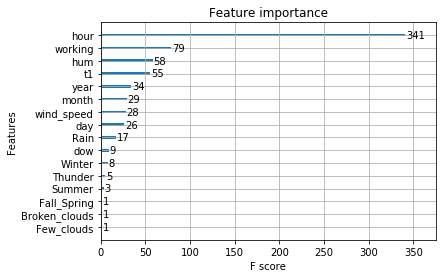

In [59]:
#Важность признаков на примере градиентного бустинга
plot_importance(model)
plt.show()

Самым важным признаком со значительным отрывом оказался 'hour' это можно объяснить тем, что в конкретные часы 'cnt' намного популярней и наоборот. Вторым по важности признаком оказался 'working' т.к именно в рабочие дни 'cnt' самый популярный.

При удалении трех наименее важных признаков, точность модели не пострадает т.к случаи 'Rain', 'Thunder', 'Snowfall' редко встречаются в датасете.

In [60]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 

In [61]:
#Нормализуем

scale_features_std = StandardScaler() 
X_norm = scale_features_std.fit_transform(X) 
X_val_norm = scale_features_std.transform(X_val)

C:\Users\marte\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\marte\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\marte\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


MSE 783090.9778831312
R2: 0.31299042459979587
MAE: 649.7950009101799
Average CV: 0.322878454134846


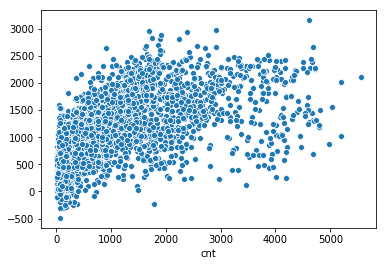

In [62]:
#Лассо c нормализацией
model = Lasso()
model.fit(X_norm, Y)

y_pred = model.predict(X_val_norm)

mae = mean_absolute_error(Y_val, y_pred)
R2 = r2_score(Y_val, y_pred)
mse = mean_squared_error(Y_val, y_pred)

print('MSE', mse)
print('R2:', R2)
print('MAE:', mae)

#Кросс-валидация
scores = cross_val_score(model, X_norm, Y, cv=5,
                        scoring='r2')
print('Average CV:', scores.mean())

sns.scatterplot(Y_val, y_pred)

MSE 783484.4451650175
R2: 0.31264523381367126
MAE: 649.9746070237575
Average CV: 0.322905479800875


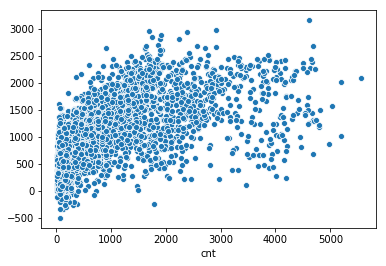

In [63]:
#Ридж c нормализацией
model = Ridge()
model.fit(X_norm, Y)

y_pred = model.predict(X_val_norm)

mae = mean_absolute_error(Y_val, y_pred)
R2 = r2_score(Y_val, y_pred)
mse = mean_squared_error(Y_val, y_pred)

print('MSE', mse)
print('R2:', R2)
print('MAE:', mae)

#Кросс-валидация
scores = cross_val_score(model, X_norm, Y, cv=5,
                        scoring='r2')
print('Average CV:', scores.mean())

sns.scatterplot(Y_val, y_pred)

MSE 887680.8876515678
R2: 0.221233181149747
MAE: 591.331275588
Average CV: 0.20777649808423018


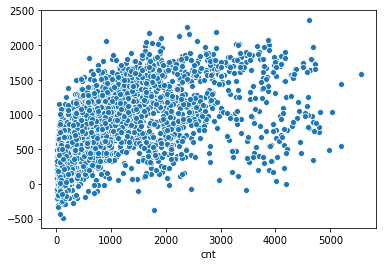

In [64]:
#SVM c нормализацией
model = svm.LinearSVR()
model.fit(X_norm, Y)

y_pred = model.predict(X_val_norm)

mae = mean_absolute_error(Y_val, y_pred)
R2 = r2_score(Y_val, y_pred)
mse = mean_squared_error(Y_val, y_pred)

print('MSE', mse)
print('R2:', R2)
print('MAE:', mae)

#Кросс-валидация
scores = cross_val_score(model, X_norm, Y, cv=5,
                        scoring='r2')
print('Average CV:', scores.mean())

sns.scatterplot(Y_val, y_pred)

После нормализации признаков нельзя заметить никакого серьезного улучшения в линейных алгоритмах, но SVM стал более адекватным. На "деревянные" алгоритмы нормализация не повлияла из-за их метода оптимизации.

# Тест

Для дальнейшего исследования был выбран Градиентный бустинг, т.к он является одним из лучших при использовании 'из коробки' и предоставляет большую гибкость при тюнинге.

In [65]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Гридим
#Очень долго, получившиеся параметры ниже

params = {'n_estimators':[400,600,800,1000,1200],
'learning_rate':[i/10.0 for i in range(1,8)], 'max_depth': [2,3,4,5,6,7,8,9]}

model = xgb.XGBRegressor()
grid = GridSearchCV(model, params)
grid.fit(X, Y)

grid.best_estimator_
print(r2_score(Y_val, grid.best_estimator_.predict(X_val))) 

C:\Users\marte\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
model = xgb.XGBRegressor(learning_rate=0.05, max_depth=7, n_estimators=700)
model.fit(X, Y)

y_pred = model.predict(X_test)

mae = mean_absolute_error(Y_test, y_pred)
R2 = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)

print('MSE', mse)
print('R2:', R2)
print('MAE:', mae)


scores = cross_val_score(model, X, Y, cv=5,
                          scoring='r2')
print('Average value on cross-validation:',scores.mean())

sns.scatterplot(Y_test, y_pred)

In [ ]:
sns.distplot(Y_test)
sns.distplot(y_pred)

Модель практически точно описывает зависимость

# Выводы

Линейные модели не выдерживают конкуренции с остальными.
Решающие деревья справляются хорошо и не требуют нормализации. 
Ансамбли деревьев всегда показывают результат лучше 'одиночных деревьев', но при этом дольше работают.
У градиентного бустинга вышла наибольшая точность, также он гибкий и предоставляет простор для тюнинга параметров.